In [2]:
def eps(x):
	return 1 + x*x

def eps1x(x):
	return 2*x

def g1y(x):
	return x

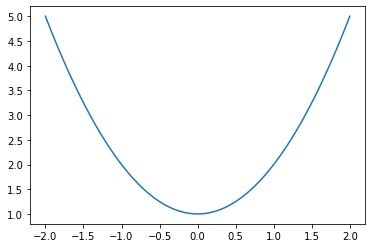

In [3]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-2, 2, 100)
plt.plot(x, eps(x), label='linear') 

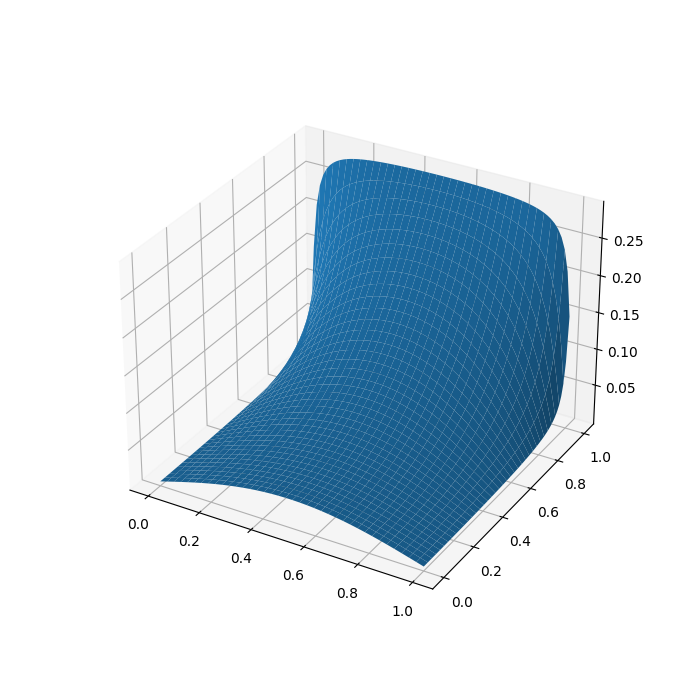

In [30]:
%matplotlib widget
import matplotlib.pyplot as plt
from ipywidgets import interactive
import numpy as np
from scipy.optimize import newton_krylov
from numpy import zeros_like, zeros
# parameters
nx, ny = 75, 75
hx, hy = 1./(nx-1), 1./(ny-1)

P_left, P_right = 1, 0.3
P_top, P_bottom = 0, 0

def popov_equ(P):
    d2x = zeros_like(P)
    d2y = zeros_like(P)
    epsilon = [eps(i*hx) for i, _ in enumerate(P) ]
    P_left = [(i*hx)*(1-i*hx) for i, _ in enumerate(P) ]

    d2x[1:-1] = (P[2:]   - 2*P[1:-1] + P[:-2]) / hx/hx
    d2x[0]    = 2*(P[1]    - P[0])/hx/hx
    d2x[-1]   = (P_right - 2*P[-1]   + P[-2])/hx/hx

    d2y[:,1:-1] = (P[:,2:] - 2*P[:,1:-1] + P[:,:-2])/hy/hy
    d2y[:,0]    = (P[:,1]  - 2*P[:,0]    + P_bottom)/hy/hy
    d2y[:,-1]   = (P_top   - 2*P[:,-1]   + P[:,-2])/hy/hy
   
    #d2x[1:-1] = (P[2:]   - 2*P[1:-1] + P[:-2]) / hx/hx
    #d2x[0]    = 2*(P[1]    - P[0])/hx/hx
    #d2x[-1]   = (P_right - 2*P[-1]   + P[-2])/hx/hx
    
    return (d2x + d2y)*epsilon  

# solve
guess = zeros((nx, ny), float)
#guess = [ np.exp(-u(i*hx-0.5)) for i in range(nx) ]
sol = newton_krylov(popov_equ, guess, method='lgmres', maxiter= 1000, verbose=0)
#print('popov_equ: %g' % abs(popov_equ(sol)).max())

x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
x, y = np.meshgrid(x, y)
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x,y,sol,  label='sol')



In [76]:
from ipywidgets import interactive
MAX_N = 1000
def plot_func(index, a):
	global _lambda
	global amp
	_lambda = index/2.0 
	amp = a*10.0
	guess = [ np.exp(-u(i*hx)) for i in range(nx) ]
	#guess = zeros(nx, float) + 1
	sol = newton_krylov(L_operator, guess, method='lgmres',  verbose=0)
	#print('L_operator: %g' % abs(L_operator(sol)).max())
	fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
	ax1.plot(sol, label='sol')
	ax2.plot(Energy(sol), label='sol')
	plt.suptitle(f' lambda = {_lambda} amp= {amp} sum = {abs(sol).sum()}')
	
w = interactive(plot_func, index = (1, MAX_N), a = (1, MAX_N))
w

interactive(children=(IntSlider(value=500, description='index', max=1000, min=1), IntSlider(value=500, descrip…

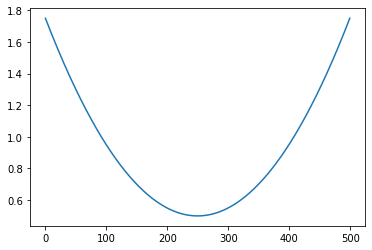

In [32]:
guess = zeros(nx, float) + 0.5
up = [ u(i*hx-0.5)*g for i, g in enumerate(guess) ]
plt.plot(up + guess, label='sol');